<a href="https://colab.research.google.com/github/vincentbonnetcg/Numerical-Bric-a-Brac/blob/master/rnn/sequence_to_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequence to Sequence for Machine Translation

In this project we will use a neural network to translate from French to English. It is heavily based on a tutorial provided by PyTorch.
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

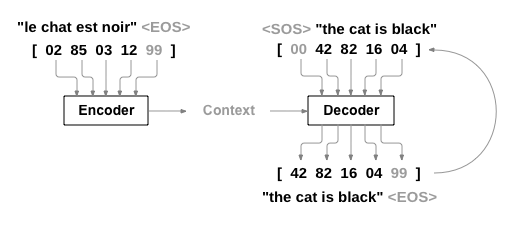

In this exercice we design an encoder-decoder architecture supporting variable-lenght sequence. We develop one **encoder** and **decoder** for sequence to sequence learning used on machine translation.  [Cho et al., 2014b, Sutskever et al., 2014]. The encoder and decoder are based on recurrent neural networks (RNN).
- The **encoder** takes a variable-length sequence and encode it into a **fixed-length hidden state**
- The **decoder** takes the fixed-length hidden state and convert it into a variable-lenght sequence.

An **attention-mechanism** is implemeted to improve the result.


# Packages

In [44]:
!pip install wget

import os
import unicodedata
import string
import re

import wget
import zipfile
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Global Variables

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
HIDDEN_SIZE = 256
SOS_TOKEN = 0
EOS_TOKEN = 1
MAX_LENGTH = 10

# Download Data and Inspect Data

We are using the dataset provided by PyTorch. It is a simple text file containing french-english translation per f

In [46]:
# Download the dataset from pytorch tutorial
URL = "https://download.pytorch.org/tutorial/data.zip"
zip_filepath = "translation_exercice.zip"
if not os.path.exists(zip_filepath):
    wget.download(URL, zip_filepath)

# Unzip
with zipfile.ZipFile(zip_filepath, 'r') as zip_obj:
    zip_obj.extractall()

# Translation dataset summary
DATA_TXT_FILE = os.path.join("data", "eng-fra.txt")
with open(DATA_TXT_FILE, "r") as f:
    lines = f.readlines()
    print(f"There are {len(lines)} examples")
    for i in range(5):
        print(f"Example {i} : {lines[i].strip()}")

There are 135842 examples
Example 0 : Go.	Va !
Example 1 : Run!	Cours !
Example 2 : Run!	Courez !
Example 3 : Wow!	Ça alors !
Example 4 : Fire!	Au feu !


# Text Encoding And Vocabulary

Neural networks can only process numbers and cannot process words or characters. For each word in our vocabulary, we will use a simple **one-hot vector** encoding. As explained in the PyTorch tutorial, there are so many words, and we will cheat by removing some of them so that we only use a few thousand words.

Our vocabulary includes two special encoding:
- **SOS** : Start Of Sentence
- **EOS** : End Of Sentence

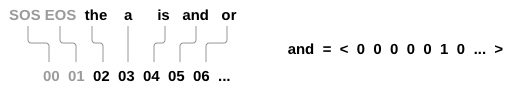

We are using a helper class called *Vocabulary* to keep track of the words and their mapping.

In [47]:
class Vocabulary:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.num_words = 2  # Count SOS and EOS

    def add_sentence(self, sentence):
        for word in sentence.split(' '):
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1


# Text Normalization and Word filtering Utilities (Cleanup)

The **text normalization** consists in standardizing the text by: 
- converting unicode => ASCII
- text to lowercase
- triming punctuation




In [48]:
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


The word filtering consists in simplying the training process filtering : 
- long sentence > MAX_LENGTH
- sentence starting with {'i am', 'i am', ... 'they re'}

In [49]:
eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

# Build Vocabulary

Create the Vocabulary object from the translation dataset file. We will use the text normalization utilities to cleanup the text.

In [50]:
def prepare_vocabulary(data_txt_filepath):
    # open file
    with open(data_txt_filepath, 'r', encoding='utf-8') as f:
        lines = f.read().strip().split('\n')
    
    # split lines into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    
    # Create english and french vocabulary
    input_voc = Vocabulary("English")
    output_voc = Vocabulary("French")

    # TODO - add word in the 


prepare_vocabulary(DATA_TXT_FILE)

# PyTorch dataset

In [ ]:
# TODO

# Encoder

In [ ]:
# TODO
class EncoderRNN(nn.Module):
    def __init__(self):
        pass

# Decoder

In [ ]:
# TODO
class DecoderRNN(nn.Module):
    def __init__(self):
        pass


# Attention Mechanism

In [ ]:
# TODO

# Training

In [ ]:
# TODO

# Evaluate

In [ ]:
# TODO

# Further Reading

In [ ]:
- https://d2l.ai/chapter_recurrent-modern/seq2seq.html
- https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html